<div style="color:red">
    <h3>To-do:</h3>
    <ul>
        <li>Finish descriptions</li>
    </ul>
</div> 

## Ch.  - Technical indicators intro

We will have a walkthrough of the code stored in `code/technical-analysis/`, in the meantime explaining the basics of building your own trading strategy.

In this tutorial, you will learn about:

* The basics of technical analysis
* Different types of charts
* Building, testing and evaluating your own strategy

<hr size="5"/>

### Table of Contents

* [1.1 Read csv file from database](#1.1-Read-csv-file-from-database)
* [1.2 Resampling](#1.2-Resampling)
* [1.3 Visualising time series data](#1.3-Visualising-time-series-data)

Requirements:
 * [pandas](https://pypi.org/project/pandas/)
 * [matplotlib](https://matplotlib.org/)
 * [numpy](https://numpy.org/)

In [83]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. What is technical analysis?

<i><b>Technical analysis</b></i> is the ...

The major steps: ...

In [84]:
aapl = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_AAPL.csv', header=0, index_col='Date', parse_dates=True)

# inspect first rows
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.405683,0.407447,0.405683,0.405683,117258400
1980-12-15,0.386281,0.386281,0.384517,0.384517,43971200
1980-12-16,0.358060,0.358060,0.356296,0.356296,26432000
1980-12-17,0.365115,0.366879,0.365115,0.365115,21610400
1980-12-18,0.375698,0.377462,0.375698,0.375698,18362400


In [85]:
aapl.describe()

,Open,High,Low,Close,Volume
count,9984.000000,9984.000000,9984.000000,9984.000000,9.984000e+03
mean,32.670008,33.007438,32.341316,32.687911,8.545261e+07
std,61.777306,62.438891,61.197083,61.856932,8.576200e+07
min,0.156982,0.156982,0.155218,0.155218,3.472000e+05
25%,0.918610,0.937983,0.898934,0.919462,3.291708e+07
50%,1.469656,1.499504,1.442897,1.471641,5.730830e+07
75%,32.676983,32.967922,32.224967,32.592890,1.065642e+08
max,395.959991,399.820007,385.959991,390.899994,1.855410e+09


In [86]:
aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [87]:
last_open = aapl['Open'][-10:]
print(last_open)

# check type of data
type(last_open)

Date
2020-07-06    370.000000
2020-07-07    375.410004
2020-07-08    376.720001
2020-07-09    385.049988
2020-07-10    381.339996
2020-07-13    389.059998
2020-07-14    379.359985
2020-07-15    395.959991
2020-07-16    386.250000
2020-07-17    387.950012
Name: Open, dtype: float64


pandas.core.series.Series

In [88]:
print(aapl.loc[pd.Timestamp('2020-07-01'):pd.Timestamp('2020-07-17')])

                  Open        High         Low       Close    Volume
Date                                                                
2020-07-01  365.119995  367.359985  363.910004  364.109985  27638400
2020-07-02  367.850006  370.470001  365.670013  367.720001  16775857
2020-07-02  367.850006  370.470001  363.640015  364.109985  28510400
2020-07-06  370.000000  375.779999  369.869995  373.850006  29663900
2020-07-07  375.410004  378.619995  372.230011  372.690002  28106100
2020-07-08  376.720001  381.500000  376.359985  381.369995  29273000
2020-07-09  385.049988  385.269989  378.690002  383.010010  31410700
2020-07-10  381.339996  383.920013  378.820007  383.679993  22564300
2020-07-13  389.059998  399.820007  381.029999  381.910004  47912300
2020-07-14  379.359985  389.019989  375.510010  388.230011  42747300
2020-07-15  395.959991  396.989990  385.959991  390.899994  38299500
2020-07-16  386.250000  389.619995  383.619995  386.089996  27644400
2020-07-17  387.950012  388.589996

In [89]:
# Inspect the first rows of 2007 
print(aapl.loc['2017-06'].head())

                  Open        High         Low       Close    Volume
Date                                                                
2017-06-01  146.811877  146.965239  145.901315  146.821457  16404100
2017-06-02  147.204882  148.997253  146.543522  148.997253  27770700
2017-06-05  147.933298  148.038732  147.089837  147.540314  25331700
2017-06-06  147.511570  149.342289  147.396556  148.038742  26624900
2017-06-07  148.585115  149.505257  148.067523  148.920578  21069600


In [90]:
# We select only the data from 2006-2019
aapl = aapl.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2019-12-31')]

aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,8.951311,9.244411,8.935233,9.244411,201808600
2006-01-04,9.291406,9.396526,9.213494,9.271619,154900900
2006-01-05,9.254306,9.262963,9.120741,9.198654,112355600
2006-01-06,9.306246,9.485569,9.219676,9.436100,176114400
2006-01-09,9.489279,9.547404,9.366845,9.405183,168760200


### 1.2 Resampling

In [91]:
sample = aapl.sample(10)
print(sample)

                  Open        High         Low       Close     Volume
Date                                                                 
2019-03-21  187.058583  193.270241  186.851849  192.049561   51034200
2011-02-08   43.739982   43.967536   43.550766   43.927963   95260200
2007-12-14   23.543261   23.893250   23.440613   23.545734  168578200
2006-08-18    8.373766    8.459099    8.318114    8.398500  134088500
2012-03-19   74.001047   74.421525   72.848433   74.338669  225309000
2012-03-12   67.892926   68.266411   67.648061   68.266411  101820600
2010-11-03   38.507451   38.694193   38.156224   38.684299  127087100
2008-06-24   21.317177   21.738895   21.225660   21.426006  155486800
2016-06-22   90.521172   91.123078   89.674738   89.862839   29219100
2007-07-30   17.849445   17.987956   17.260770   17.490799  276747100


In [92]:
# Resample to monthly level
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl.head())

                Open      High       Low     Close        Volume
Date                                                            
2006-01-31  9.646837  9.826964  9.463248  9.622845  2.734796e+08
2006-02-28  8.666998  8.799066  8.449467  8.597482  2.468513e+08
2006-03-31  7.977159  8.082119  7.819936  7.919303  2.520938e+08
2006-04-30  8.305358  8.426230  8.158384  8.286417  2.647274e+08
2006-05-31  8.347965  8.422168  8.167743  8.259034  1.773725e+08


In [93]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

print(aapl.head())

# Delete the new `diff` column
del aapl['diff']

                Open      High       Low     Close     Volume      diff
Date                                                                   
2006-01-03  8.951311  9.244411  8.935233  9.244411  201808600 -0.293101
2006-01-04  9.291406  9.396526  9.213494  9.271619  154900900  0.019787
2006-01-05  9.254306  9.262963  9.120741  9.198654  112355600  0.055652
2006-01-06  9.306246  9.485569  9.219676  9.436100  176114400 -0.129854
2006-01-09  9.489279  9.547404  9.366845  9.405183  168760200  0.084097


### 1.3 Visualising time series data

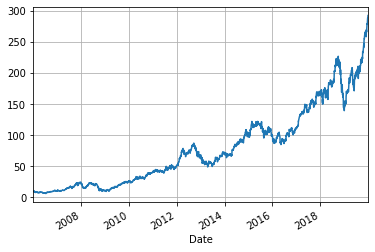

In [94]:
# Plot the opening prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

### 1.4 Calculate percentage change

In [95]:
daily_close = aapl[['Close']]

# Calculate daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change.head())

               Close
Date                
2006-01-03  0.000000
2006-01-04  0.002943
2006-01-05 -0.007870
2006-01-06  0.025813
2006-01-09 -0.003276


In [96]:
# Calculate daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns.head())

               Close
Date                
2006-01-03       NaN
2006-01-04  0.002939
2006-01-05 -0.007901
2006-01-06  0.025486
2006-01-09 -0.003282


In [97]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate monthly percentage change
monthly.pct_change().tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-08-30,-0.025236,-0.045717,-0.015678,-0.016461,-0.694819
2019-09-30,0.051104,0.067142,0.065589,0.072962,0.228629
2019-10-31,0.119240,0.109493,0.074596,0.110684,0.339260
2019-11-29,0.081542,0.078800,0.124076,0.077554,-0.665012
2019-12-31,0.087509,0.095821,0.088830,0.098784,1.162394


In [98]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate quarterly percentage change
quarter.pct_change().tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-09-30,0.169907,0.166745,0.172115,0.170176,-0.223827
2019-01-31,-0.089344,-0.085867,-0.097034,-0.091758,0.511812
2019-05-31,0.019615,0.017389,0.027790,0.023316,-0.310644
2019-09-30,0.104137,0.103838,0.103444,0.102620,-0.077098
2020-01-31,0.255415,0.253627,0.257661,0.258518,-0.019039


In [99]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
daily_pct_change.tail()

,Close
Date,
2019-12-24,0.000951
2019-12-26,0.019840
2019-12-27,-0.000380
2019-12-30,0.005935
2019-12-31,0.007306


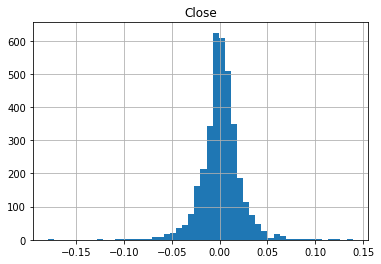

             Close
count  3522.000000
mean      0.001181
std       0.020003
min      -0.179196
25%      -0.008113
50%       0.000949
75%       0.011245
max       0.139049


In [100]:
# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

### 1.5 Cumulative daily rate of return

In [101]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
cum_daily_return.tail()

,Close
Date,
2019-12-24,30.594841
2019-12-26,31.201854
2019-12-27,31.190013
2019-12-30,31.375131
2019-12-31,31.604372


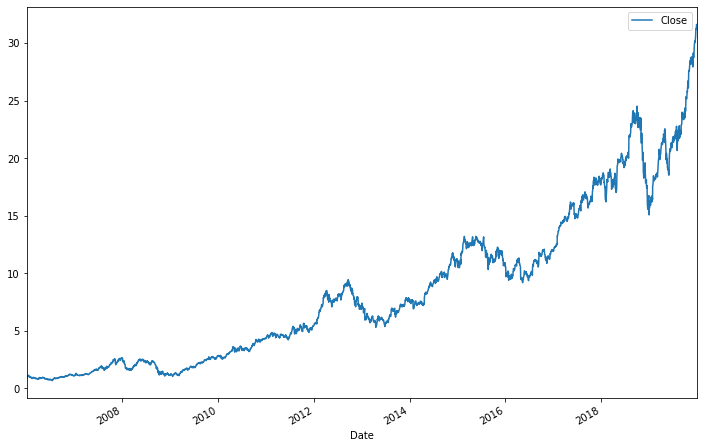

In [102]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [103]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
cum_monthly_return.tail()

,Close
Date,
2019-08-31,21.970501
2019-09-30,23.391702
2019-10-31,25.247149
2019-11-30,28.237478
2019-12-31,29.761356


### 1.6 Comparison of stocks

In [104]:
goog = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_GOOG.csv', header=0, index_col='Date', parse_dates=True)
msft = pd.read_csv('../../database/nasdaq_ticks_day/nasdaq_MSFT.csv', header=0, index_col='Date', parse_dates=True)
ibm = pd.read_csv('../../database/nyse_ticks_day/nyse_IBM.csv', header=0, index_col='Date', parse_dates=True)

# Select only the data from 2006-2019
goog = goog.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2019-12-31')]
msft = msft.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2019-12-31')]
ibm = ibm.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2019-12-31')]


In [105]:
tickers = ['AAPL', 'GOOG', 'MSFT', 'IBM']
dfs = [aapl, goog, msft, ibm]
data = pd.concat(dfs, keys=tickers, names=['Ticker', 'Date'])

data

Open        High         Low       Close     Volume
Ticker Date                                                                 
AAPL   2006-01-03    8.951311    9.244411    8.935233    9.244411  201808600
       2006-01-04    9.291406    9.396526    9.213494    9.271619  154900900
       2006-01-05    9.254306    9.262963    9.120741    9.198654  112355600
       2006-01-06    9.306246    9.485569    9.219676    9.436100  176114400
       2006-01-09    9.489279    9.547404    9.366845    9.405183  168760200
       2006-01-10    9.429919   10.127423    9.377976   10.000042  569967300
       2006-01-11   10.368583   10.487306   10.213994   10.376002  373448600
       2006-01-12   10.508332   10.685182   10.341375   10.424235  320202400
       2006-01-13   10.510804   10.636948   10.462572   10.585007  194076400
       2006-01-17   10.598610   10.682707   10.372292   10.476176  208905900
       2006-01-18   10.274589   10.394550   10.122473   10.201623  300159300
       2006-01-19   10.048272   10.098978    9.737858    9.774960  423962000
       2006-01-20    9.804640    9.898631    9.377975    9.410130  283689700
       2006-01-23    9.411369    9.839271    9.399001    9.605533  264932500
       2006-01-24    9.740333    9.821957    9.370557    9.403948  285563600
       2006-01-25    9.570903    9.584506    9.058905    9.176393  318946600
       2006-01-26    9.217203    9.328507    8.895659    8.945127  295346800
       2006-01-27    9.021804    9.102191    8.793012    8.908027  238466200
       2006-01-30    8.801672    9.473206    8.764571    9.275332  349600300
       2006-01-31    9.337166    9.441050    9.120742    9.338403  228385500
       2006-02-01    9.269146    9.455890    9.230808    9.327271  130296600
       2006-02-02    9.287696    9.319850    8.910499    8.916682  176830500
       2006-02-03    8.933997    9.002016    8.785592    8.885766  173030900
       2006-02-06    8.906788    8.967387    8.253805    8.323061  412941900
       2006-02-07    8.443023    8.592665    8.246385    8.360163  347207700
       2006-02-08    8.470231    8.543197    8.162290    8.509806  238278600
       2006-02-09    8.545673    8.561750    7.980496    8.032437  287441000
       2006-02-10    8.060881    8.368822    7.778910    8.324300  440119400
       2006-02-13    8.240202    8.255042    7.994096    8.002753  220874500
       2006-02-14    8.050986    8.422000    8.038619    8.365110  290234700
...                       ...         ...         ...         ...        ...
IBM    2019-11-18  131.153188  131.328964  130.108253  131.162949    3210400
       2019-11-19  131.719607  132.207892  131.309450  131.368042    2995000
       2019-11-20  130.918814  131.309450  129.639511  130.078964    4138200
       2019-11-21  130.274272  131.026234  129.864114  130.703964    3345300
       2019-11-22  131.045766  131.494979  130.459819  131.192245    3297500
       2019-11-25  131.319204  132.813353  131.202021  132.784058    2590100
       2019-11-26  132.959828  132.959828  131.612173  131.924667    3793200
       2019-11-27  132.178585  132.530151  130.489111  130.635605    3280900
       2019-11-29  130.469608  131.368050  129.912957  131.299683    1825300
       2019-12-02  131.299670  131.348502  129.375829  129.795761    3067100
       2019-12-03  128.907078  129.336771  127.627775  129.024261    3642500
       2019-12-04  129.746934  130.547712  128.868028  128.897324    3530000
       2019-12-05  129.873879  130.118022  128.545745  128.819183    3595400
       2019-12-06  129.639507  130.752795  129.590676  130.098495    3437500
       2019-12-09  130.225453  131.436389  130.137550  130.782089    2968500
       2019-12-10  130.782099  131.680541  130.430534  130.772339    3480400
       2019-12-11  130.967644  131.358266  130.537952  130.625839    3953300
       2019-12-12  130.567240  132.481322  130.528184  132.149292    4824100
       2019-12-13  131.592648  132.325075  130.869982  131.065308    2535000
       2019-12-16  13

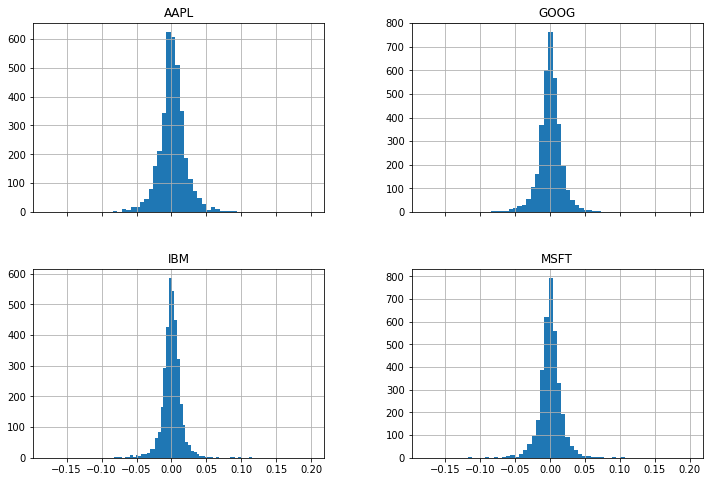

In [106]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = data[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

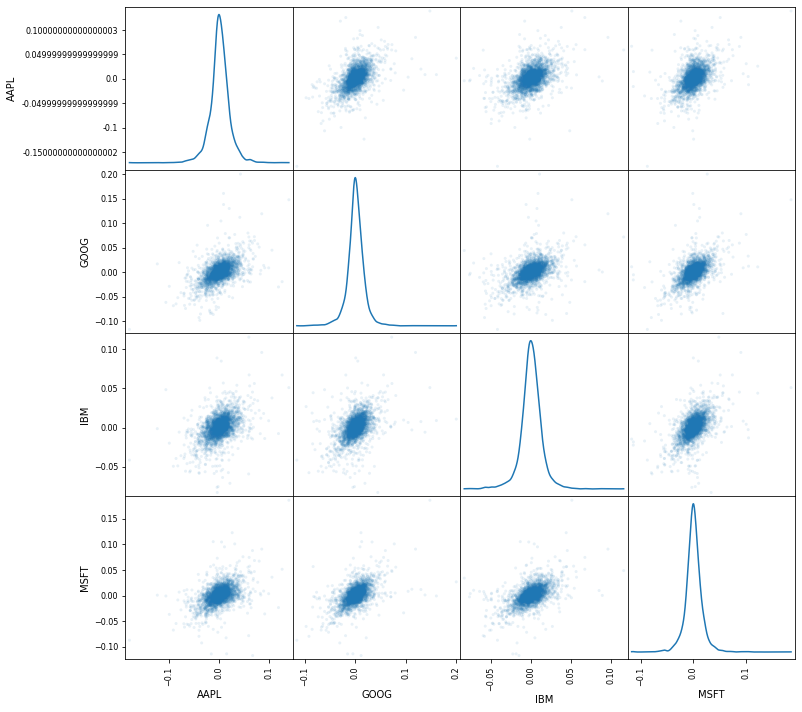

In [107]:
from pandas.plotting import scatter_matrix

# Plot a scatter matrix with the `daily_pct_change` data 
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### 1.7 Moving windows

In [108]:
# Isolate the closing prices 
close_px = aapl['Close']

# Calculate the moving average
moving_avg = close_px.rolling(window=40).mean()

# Inspect the result
moving_avg.tail()

Date
2019-12-24    264.221056
2019-12-26    265.398771
2019-12-27    266.574494
2019-12-30    267.656605
2019-12-31    268.616614
Name: Close, dtype: float64

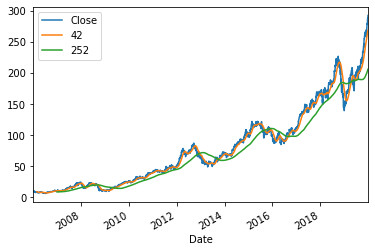

In [109]:
# Short moving window rolling mean
aapl['42'] = close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Close', '42', '252']].plot()

# Show plot
plt.show()

### 1.8 Volatility calculation

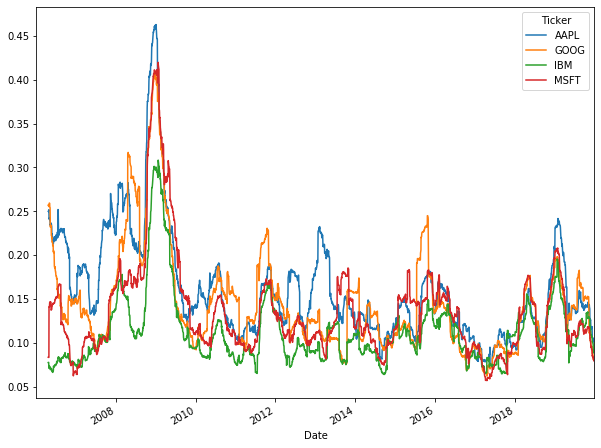

In [110]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [111]:
#### Ordinary Least-Squares Regression (OLS)

# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
from pandas import tseries

# Isolate the closing price
all_close = data[['Close']]

# Calculate the returns 
all_returns = np.log(all_close / all_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],(X.values)).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     962.7
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          4.58e-187
Time:                        19:05:56   Log-Likelihood:                 9844.9
No. Observations:                3522   AIC:                        -1.969e+04
Df Residuals:                    3520   BIC:                        -1.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.849      0.3

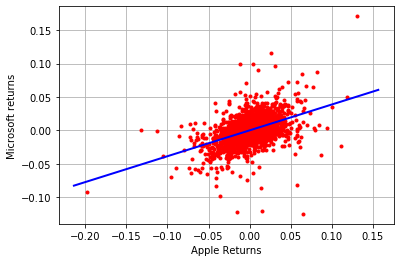

In [112]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

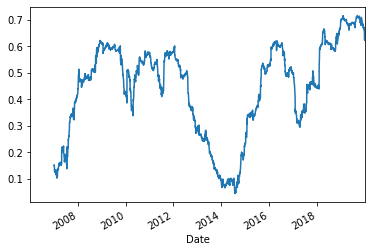

In [113]:
# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

### References:
* [Algorithmic trading explained](https://www.youtube.com/watch?v=73fnrywIhl8) (Youtube video)
* [DataCamp - Python for Finance: Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=255798340456&utm_targetid=aud-299261629574:dsa-473406585355&utm_loc_interest_ms=&utm_loc_physical_ms=1009279&gclid=Cj0KCQjwrIf3BRD1ARIsAMuugNu2UkliuXEzSS4V08jCIQPtBByx7Eu8tEZh0J34NJ395kpOC_t0-MUaAtF5EALw_wcB)